# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [ ]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

In [ ]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

### Interlude: Simplified simulator agent

It was very hard to restart ROS simulator every time, so I've created very simple emulator to run and debug my code there. The source code of the mulator itself is located in tasks/emulator/emulator.py. Copter there gets (x, y, z) acceleration as three-dimentional action, and physics is very simple: copter is just moves with given acceleration minus gravity. If it gets to the zero level, z velocity becomes zero and if can't go lover that that. For very simplified case we will only control copter along z-axis, leaving x and y action equal to zero.

In the end with this environment I've seen how my copter can hover and stabilize itself in xy plane. Almost victory! But not so fast, we still have to go to reality.

In [1]:
import tensorflow as tf
from tasks import EmulatorHover
from agents import DeepDPGAgent

tf.reset_default_graph()

# Setup learning parameters
DeepDPGAgent.tau = 0.001
DeepDPGAgent.gamma = 0.99
DeepDPGAgent.learning_rate = 0.001
DeepDPGAgent.batch_size = 128

# In the emulator episodes are shorter so it's better to drop old replay data faster
DeepDPGAgent.replay_buffer_size = 20000

# Create task and agent
task = EmulatorHover(simplified=True)
agent = DeepDPGAgent(task)



D:\Software\Python\3.5\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from helpers import learn_agent

num_episodes_per_run = 400
total_episodes_done = 0

In [3]:
# Run this cell until learning is complete

learn_agent(num_episodes_per_run, agent, task, episode_start=total_episodes_done, log_episode_every=200)

total_episodes_done += num_episodes_per_run


 0.10: [  0.000,   0.000,   6.370,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000] => [ -0.021], R =  -8.679
 0.20: [  0.000,   0.000,   6.321,   0.000,   0.000,   0.000,   0.000,   0.000,  -0.982,   0.000,   0.000,   0.000] => [ -0.018], R =  -8.826
 0.30: [  0.000,   0.000,   6.174,   0.000,   0.000,   0.000,   0.000,   0.000,  -1.964,   0.000,   0.000,   0.000] => [ -0.026], R =  -9.072
 0.40: [  0.000,   0.000,   5.928,   0.000,   0.000,   0.000,   0.000,   0.000,  -2.946,   0.000,   0.000,   0.000] => [ -0.038], R =  -9.416
 0.50: [  0.000,   0.000,   5.584,   0.000,   0.000,   0.000,   0.000,   0.000,  -3.930,   0.000,   0.000,   0.000] => [ -0.046], R =  -9.858
 0.60: [  0.000,   0.000,   5.142,   0.000,   0.000,   0.000,   0.000,   0.000,  -4.915,   0.000,   0.000,   0.000] => [ -0.053], R = -10.399
 0.70: [  0.000,   0.000,   4.601,   0.000,   0.000,   0.000,   0.000,   0.000,  -5.900,   0.000,   0.000,   0.000] => [ -0.057], R = -11.038
 0.80:

Let's look how emulator behaves and gets rewards:

In [4]:
from helpers import play_episode
import pandas as pd
from pathlib import Path

def load_task_results(task, num_episodes):
    results_path = Path.cwd() / 'results'
    rewards_file_name = task.task_name + '-rewards.csv'
    rewards = pd.read_csv(str(results_path / rewards_file_name))
    
    # Now let's play one episode and get logs
    record_file_name = task.task_name + '-ep-{:04d}.log.csv'.format(num_episodes)
    record = pd.read_csv(str(results_path / record_file_name))
    
    return rewards, record
    

# agent.load_task_agent()
rewards, record = load_task_results(task, total_episodes_done)

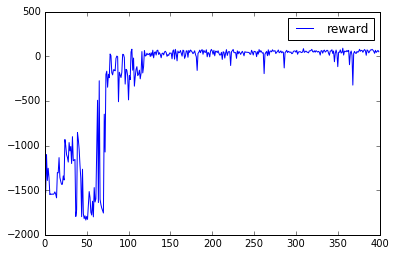

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rewards['episode'], rewards['reward'])
plt.legend()
_ = plt.ylim()

*I've written a description below and then rerun learning again. Now graphs are different of what I had while writing a description, but key points almost remain there.*

Reward graph over time shows that agent is definitely learning. We can clearly see steep step when agent discovers how to go up. Then rewards drop because at this point agent gets up too high. After some time it learns to stay at the hover position. 

In the end of the learning process sometimes we can see strong reward noise. I don't know the reason of this, but probably since I keep the noise level sometimes it confises learning agent and gets it out of the way. Below we can see several peaks in the controls. Probably those are the reason. Probably this is caused also because I don't use any network regularization, but with several experiments in my case regularizatin didn't work well so I've decided not to use it.

Now let's look at the position of the copter:

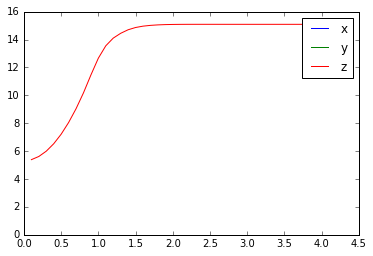

In [6]:
plt.plot(record['time'], record['x'])
plt.plot(record['time'], record['y'])
plt.plot(record['time'], record['z'])
plt.legend()
_ = plt.ylim()

Let's look onto controls: See how poser drops to negative to get up-speed back to zero whilre reaching target height

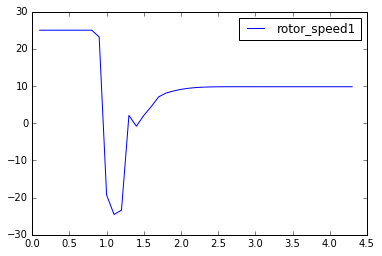

In [7]:
for i in range(task.num_actions):
    plt.plot(record['time'], record['rotor_speed{}'.format(i+1)])
plt.legend()
_ = plt.ylim()

### Interlude 2: Emulator agent with full control

Let's make the task more complicated and add more controls to the agent. Now we have both x, y and z accelerations to be controlled.

In [8]:
import tensorflow as tf
from tasks import EmulatorHover
from agents import DeepDPGAgent

tf.reset_default_graph()

# Setup learning parameters
DeepDPGAgent.tau = 0.01
DeepDPGAgent.gamma = 0.99
DeepDPGAgent.learning_rate = 0.001
DeepDPGAgent.batch_size = 128

# In the emulator episodes are shorter so it's better to drop old replay data faster
DeepDPGAgent.replay_buffer_size = 20000

# Create task and agent
task = EmulatorHover(simplified=False)
agent = DeepDPGAgent(task)


In [9]:
from helpers import learn_agent

num_episodes_per_run = 400
total_episodes_done = 0

In [20]:
# Run this cell until learning is complete
    
learn_agent(num_episodes_per_run, agent, task, episode_start=total_episodes_done, log_episode_every=200)

total_episodes_done += num_episodes_per_run


 0.10: [  0.000,   0.000,   4.871,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000] => [  5.228,  -7.281,  25.000], R = -10.059
 0.20: [  0.026,  -0.036,   4.947,   0.000,   0.000,   0.000,   0.523,  -0.728,   1.520,   0.000,   0.000,   0.000] => [  4.692,  -7.038,  25.000], R =  -9.849
 0.30: [  0.102,  -0.144,   5.175,   0.000,   0.000,   0.000,   0.992,  -1.432,   3.040,   0.000,   0.000,   0.000] => [  4.677,  -7.031,  25.000], R =  -9.499
 0.40: [  0.224,  -0.323,   5.555,   0.000,   0.000,   0.000,   1.460,  -2.135,   4.560,   0.000,   0.000,   0.000] => [  4.545,  -6.971,  25.000], R =  -9.009
 0.50: [  0.393,  -0.571,   6.087,   0.000,   0.000,   0.000,   1.914,  -2.832,   6.080,   0.000,   0.000,   0.000] => [  4.315,  -6.868,  25.000], R =  -8.378
 0.60: [  0.606,  -0.889,   6.771,   0.000,   0.000,   0.000,   2.346,  -3.519,   7.600,   0.000,   0.000,   0.000] => [  3.913,  -6.686,  25.000], R =  -7.606
 0.70: [  0.860,  -1.274,   7.607,   0.0

Let's look how emulator behaves and gets rewards:

In [23]:
from helpers import play_episode
import pandas as pd
from pathlib import Path

def load_task_rewards(task):
    results_path = Path.cwd() / 'results'
    rewards_file_name = task.task_name + '-rewards.csv'
    return pd.read_csv(str(results_path / rewards_file_name))
    
def load_task_episode_results(task, episode):
    results_path = Path.cwd() / 'results'
    record_file_name = task.task_name + '-ep-{:04d}.log.csv'.format(episode)
    return pd.read_csv(str(results_path / record_file_name))    

# agent.load_task_agent()
rewards = load_task_rewards(task)
results_800 = load_task_episode_results(task, 800)
results_last = load_task_episode_results(task, total_episodes_done)

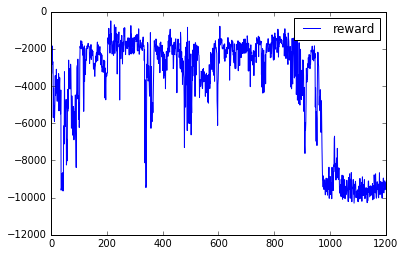

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rewards['episode'], rewards['reward'])
plt.legend()
_ = plt.ylim()

Here we can see severe drop of rewards after around step 900. I've seen it many times: agent at one moment starts to force action values. Probably this is the problem with the learning, but right now I don't have still answer on this question. I've experimented with size of the network layers and learning parameters, but it didn't help. I've seen also at the forum that many people also face this problem and my mentor also wasn't yet able to answer the question "why". Unfortunately I have to leave it as is having no further progress on this. 

But let's still look at what agent has learned before the drop:

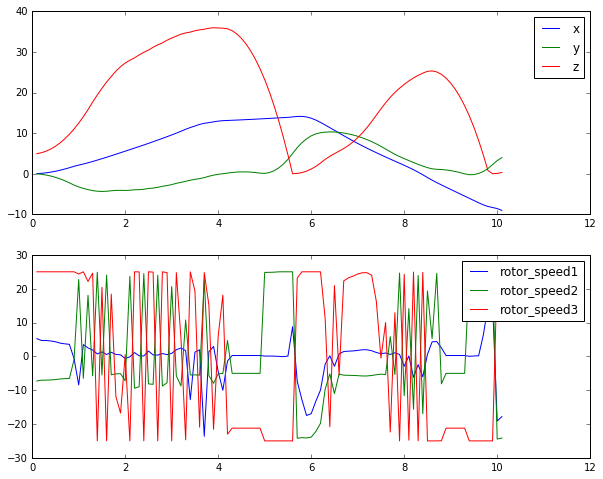

In [30]:
fig = plt.figure(figsize=(10, 8)) 

plt.subplot(2, 1, 1)
plt.plot(results_800['time'], results_800['x'])
plt.plot(results_800['time'], results_800['y'])
plt.plot(results_800['time'], results_800['z'])
plt.legend()
_ = plt.ylim()


plt.subplot(2, 1, 2)
for i in range(task.num_actions):
    plt.plot(results_800['time'], results_800['rotor_speed{}'.format(i+1)])
plt.legend()
_ = plt.ylim()

Here we can see that agent still tries to keep the copter near the target point. But for some reason control values go to high and with this aproach agent can't succeed.

When rewards drop we can see that control action just go to somewhat maximum values and agent fly away unontrollably.

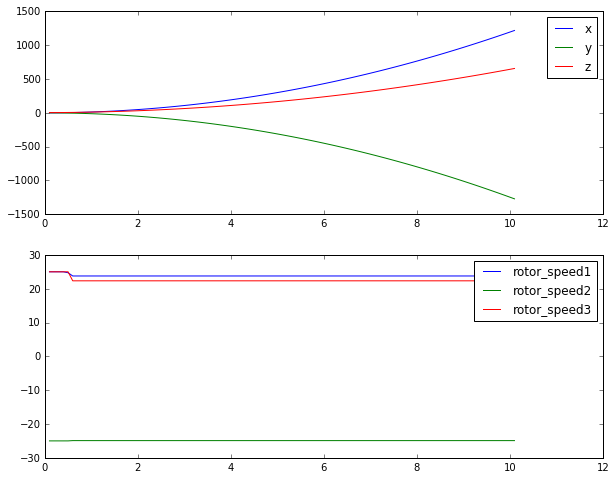

In [31]:
fig = plt.figure(figsize=(10, 8)) 

plt.subplot(2, 1, 1)
plt.plot(results_last['time'], results_last['x'])
plt.plot(results_last['time'], results_last['y'])
plt.plot(results_last['time'], results_last['z'])
plt.legend()
_ = plt.ylim()


plt.subplot(2, 1, 2)
for i in range(task.num_actions):
    plt.plot(results_last['time'], results_last['rotor_speed{}'.format(i+1)])
plt.legend()
_ = plt.ylim()

### Back to the true Emulator

We see that our agent can lern to control copetr in the very simple environment.

In [1]:
import tensorflow as tf
from tasks import Hover
from agents import DeepDPGAgent

tf.reset_default_graph()

# Setup learning parameters
DeepDPGAgent.tau = 0.001
DeepDPGAgent.gamma = 0.99
DeepDPGAgent.learning_rate = 0.001
DeepDPGAgent.batch_size = 128

# Create task and agent
# task = Takeoff()
task = Hover(simplified=True)
agent = DeepDPGAgent(task, batch_size=128)

D:\Software\Python\3.5\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from helpers import learn_agent

num_episodes_per_run = 20
total_episodes_done = 0

In [3]:
# Run this cell until learning is complete
    
learn_agent(num_episodes_per_run, agent, task, episode_start=total_episodes_done, log_episode_every=10)

total_episodes_done += num_episodes_per_run

 0.02: [  0.000,   0.000, 101.402,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000] => [458.769], R =   5.421
 0.04: [  0.000,   0.000, 101.402,   0.000,   0.000,   0.000,   0.000,   0.000,   0.057,   0.000,   0.000,   0.000] => [458.770], R =   5.421
 0.06: [  0.000,   0.000, 101.404,   0.000,   0.000,   0.000,   0.000,   0.000,   0.114,   0.000,   0.000,   0.000] => [458.772], R =   5.422
 0.08: [  0.000,   0.000, 101.407,   0.000,   0.000,   0.000,   0.000,   0.000,   0.170,   0.000,   0.000,   0.000] => [458.774], R =   5.423
 0.10: [  0.000,   0.000, 101.411,   0.000,   0.000,   0.000,   0.000,   0.000,   0.226,   0.000,   0.000,   0.000] => [458.776], R =   5.425
 0.12: [  0.000,   0.000, 101.416,   0.000,   0.000,   0.000,   0.000,   0.000,   0.283,   0.000,   0.000,   0.000] => [458.778], R =   5.427
 0.14: [  0.000,   0.000, 101.422,   0.000,   0.000,   0.000,   0.000,   0.000,   0.338,   0.000,   0.000,   0.000] => [458.780], R =   5.429
 0.16:

I spend a lot of time trying to figure out why here my agent gets to maximum action value, but I didn't succeed. For some runs I've made it work for maybe a hudred of episodes trying to find a solution, but eventually it always go for maximum or minimum value depending on the reward funtion. I can't find a balance value.

I'm not satisfied with the results, but I have no idea what's wrong here...

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [5]:
from helpers import play_episode
import pandas as pd
from pathlib import Path

def load_task_results(task, num_episodes):
    results_path = Path.cwd() / 'results'
    rewards_file_name = task.task_name + '-rewards.csv'
    rewards = pd.read_csv(str(results_path / rewards_file_name))
    
    # Now let's play one episode and get logs
    record_file_name = task.task_name + '-ep-{:04d}.log.csv'.format(num_episodes)
    record = pd.read_csv(str(results_path / record_file_name))
    
    return rewards, record
    

# agent.load_task_agent()
rewards, record = load_task_results(task, total_episodes_done)

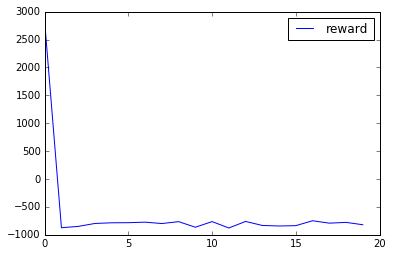

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rewards['episode'], rewards['reward'])
plt.legend()
_ = plt.ylim()

Then positions:

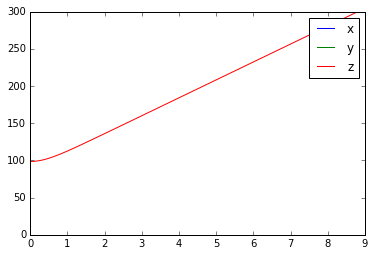

In [9]:
plt.plot(record['time'], record['x'])
plt.plot(record['time'], record['y'])
plt.plot(record['time'], record['z'])
plt.legend()
_ = plt.ylim()

And controls:

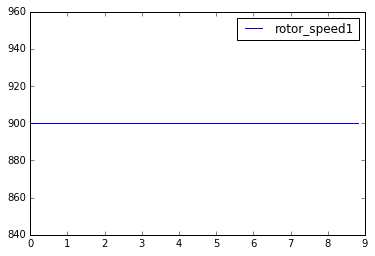

In [11]:
for i in range(task.num_actions):
    plt.plot(record['time'], record['rotor_speed{}'.format(i+1)])
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

My task is to drop quadrocopter at some height and then it should go up to higher position and stay there for a while. I've tried first to control only vertical force to simplify the task and make sure it works. After that I could switch to control also orientation and position of the copter.

My first version of the reward function was just to subtract liner penalty if copter stays away from the target height. Close to the target aditional reward would be added proportionally how close copter is to the target. To stabilise copter horizontally I've added also linear penalty for distance from point (0, 0) in xy plane.

It was very hard to restart ROS simulator every time, so I've created very simple emulator to run and debug my code there. In the end I've seen how my copter can hover and stabilize itself in xy plane what has been shown above.

This worked fine with my simple emulator until environment has been changed. With the first version of environment copter which goes out of the position scope would not go further, for example it would lay on the ground. Eposode does not ends until time is out, so in case of staying on the ground agent gets all the penalties.

After environment has been changed, episode ends when copter is out of the space and in this case local minimum appears when it's better for opter to end the eposide as soon as possible thus not getting all penalties. Because of that I've added minimum value for penalty and reward function can't return less than this value. For angle stabilization I've added some penalties based on cos() for angles and small linear penalties for high angular speeds.

I've spent much time on experimenting but in the end unfortunatelly I haven't managed to create proper reward function despite Now I think that I have to send the project even if it does not achieves the target.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I've tried anly a Q-learn algoritm proposed in the task as the most powerful one. I would try anoother one, but in the end I've spent so much time on trying to tune the reward function and hyperparameters that I have no more time to try anything else.

First of all I've tried several values of learning rates as recommended: 0.1, 0.01, ..., 0.0001. Seems like 0.001 value is the best suiting. With bigger values algorithm tends to fall into local extrema far beyound the optimal solution, and with with smaller ones it learns slow, taking many episodes to start learning at least anything. So values recommended by authors of the original article were the best suited, so in the end I've sticked to them.

For actor network I've used three dense layers (64, 128 and 128 neurons) with relu activation with one action layer on top with tanh activation. I've tried also sigmoid activation, but with tanh agent tend to learn much faster. For emulator with one action it takes it takes 800-120 episodes versus 300+ and more for sigmoid activation. Also with tanh precision of the controls is higher, graps show very nice curves. For sigmoid activation I've noticed some overcotrol and then noise after many episodes. Number of neurons seems to be somewhat optimal for results and speed of learning among several combinations of 2 or 3 layers of 16-32-64-128 neurons.

For critic network I've used two dense layers of 64 neurons each on top of states concatenated with one dense layer of 64 neurons on top of actions. Those were topped by two dense desicion layes with 128 neurons each.

Architectures with less layers we not able to stabilize more than one action even for shor number of episodes, so I've kept those architectures. Probably more neurons should be still added to learn how to cope with four actions.

All normalization techniques I've tried made learning process worse: unstable, not presize, not converging etc. In the end I think that keeping two networks (current and target) and using soft update keeps the whole system from overfitting and falling into loal minima too fast.

I've added also ON-noise of level 2 as composition of two ON-noises. Higher noise is updated every fifxe amount of episodes and has higher sigma. Lower level noise moces it's mu to the value of the high level noise. This allowed me to keep action noise even more stable but stil noisy. The problem with the first simulator for me was that you had to keep action modified for some time to see its reflection on the copter movements.

Also I've added some +-10% noise to the start height of the episode. It appeared that having this noise we see first move agent improvement from just noise much faster than if start position of the episodes is fixed.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

I guess it was not really hard task, but it was still too hard for my agent. In "real" environment it didn't learn to hover, maximizing actions and going up at maximal speed even being punished for that.

In simple environment we can see that agent usually has flat or descending learning curve and then it has the first aha moment when it really starts to discover the space. After that we can see different behaviour of the curve: it can be noisy and then flat if agent revises the policy, it can be gradual if control precision grows and there could be also several more aha moments if agent has to change it's behavior. For example in my hover task second aha moment comes when agent starts to hover instead of just going up. If it learns to stay near zero position in xy plane we can see a gradual curve.

The final performance for simple environment with one-dimentional task is perfect. For harder tasks it is not perfect any more and for real environment control task is not solved at all.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The hardest part was first to get it all to work. Probably I've spent more time becase I really wanted to create all the computational model myself and creating it in tensorflow took some additional time than just copy-pasting and adoption code given in the lectures. I've also spent a lot of time trying to run ROS with simulator and in the end I've ended up writing my own simple simulator to be able to debug learning and ensure that my agent can do the job. Only then I've found a serious problem in the tensor graph and after fixing I've seen how agent can learn. After all Udacity team did the same job exept the simulator is much more complicated than I had.

The second hard part was to create proper reward function. It appeared that this function is the most important part of the task and if not fine tuned than any task harder than simple takeoff ank keeping balanse causes the whole system to fall into local minimum (there are a lot of them!).

I could tell a lot of stories of seeing those columns of numbers. It was log hours but each finding was a bit of fun. Sometimes you can see how agent stays for a log at one place and then suddenly goes over the barrier and gets much closer to the solution. In other cases it goes slowly up and down untill reaches better policy. Often it gets missed very far from thre optimal way, but sometimes it recovers back.

After completing the project I think that despite Q-learning has probably very big future and we can already solve some problems using it, but it is still very hard to use beyound the laboratory and virtual environment with really complicated tasks when agent penalty is hard to calculate. Modern system control math allows us to design much more effective systems optimized for solving concrete task, but we can still use some ML to tune the model. Good thing at other hand is that this approach can be combined with other NN applications like image or speach recognition and this simbiose can give great results as bot playing games seeing only picture on the screen for example.

But in any way, this project gave me some understanding on how to approach system control problems with deep learning and broght some nice hours of fun. I wish I could spend more time on the subject it in the laboratory :-) And I want to thank all the Udacity team for this great experience and the whole Deep Learning Nanodegree.